In [1]:
from pathlib import Path
import re

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
mpl.rcParams['axes.labelsize'] = 20

In [3]:
RE_PAREN = re.compile(r'\(([\d\.]+)\)')

In [4]:
def get_eval_data(output_paths):
    steps = []
    perp = []
    last_max = 0
    for out_path in output_paths:
        for path in out_path.iterdir():
            if not 'checkpoint' in path.name:
                continue
            res = path / 'eval_results.txt'
            if not res.exists():
                continue
            steps.append(last_max + int(path.name.split('-')[1]))
            perp.append(float(RE_PAREN.findall(res.open().read())[0]))
        if steps:  # only update max if steps has elements
            last_max = max(last_max, max(steps))
    return steps, perp

minimum perplexity 3.393
minimum perplexity 4.2048


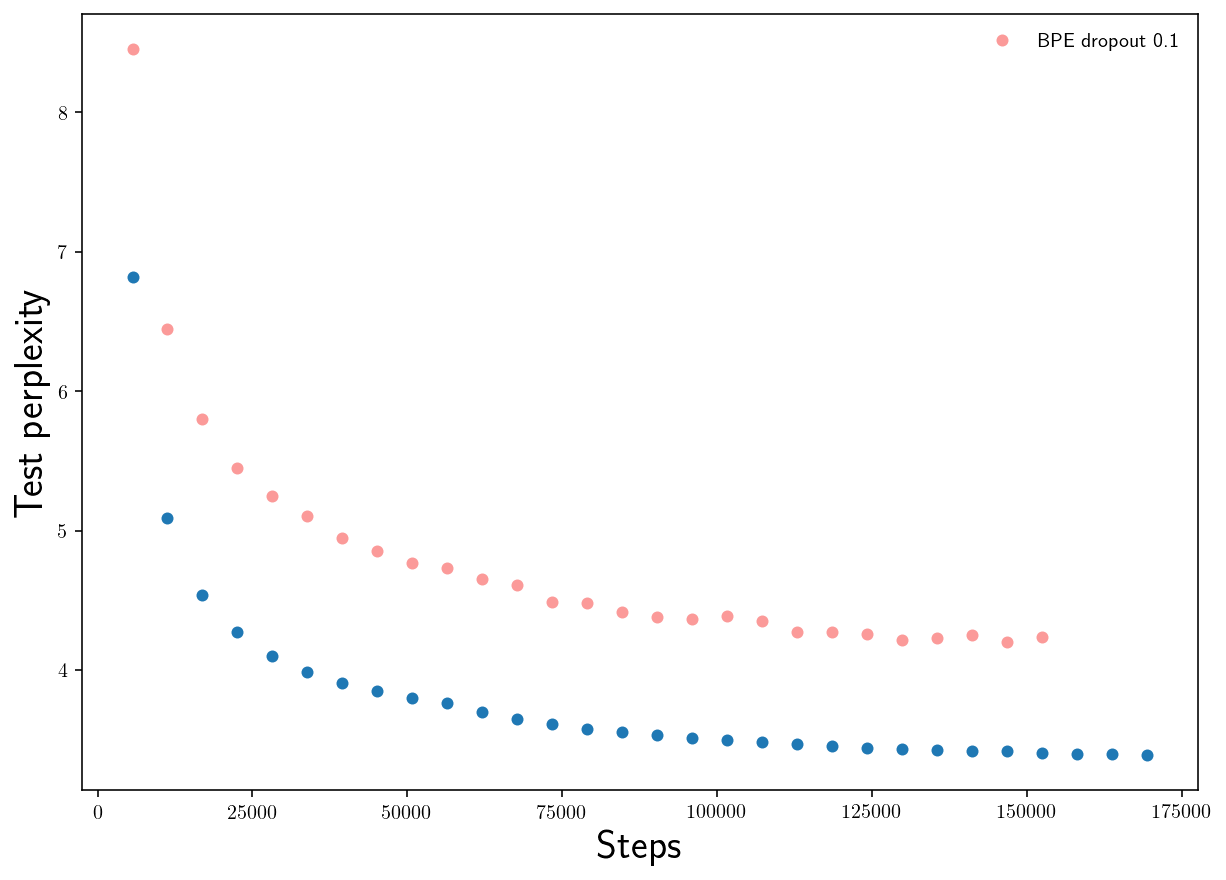

In [5]:
steps, perp = get_eval_data(
    [  
        Path('/smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-17/2020-02-17')
    ]
)
steps1, perp1 = get_eval_data(
    [  
        Path('/smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-18/2020-02-18')
    ]
)

if steps:
    fig, axe = plt.subplots(figsize=(10, 10 / 1.4))

    axe.plot(steps, perp, 'o',)
    axe.plot(steps1, perp1, 'o', label='BPE dropout 0.1')
    plt.legend()
    axe.set_xlabel('Steps')
    axe.set_ylabel('Test perplexity')
    print(f'minimum perplexity {min(perp)}')
    print(f'minimum perplexity {min(perp1)}')

minimum perplexity 3.3962
minimum perplexity 4.0388


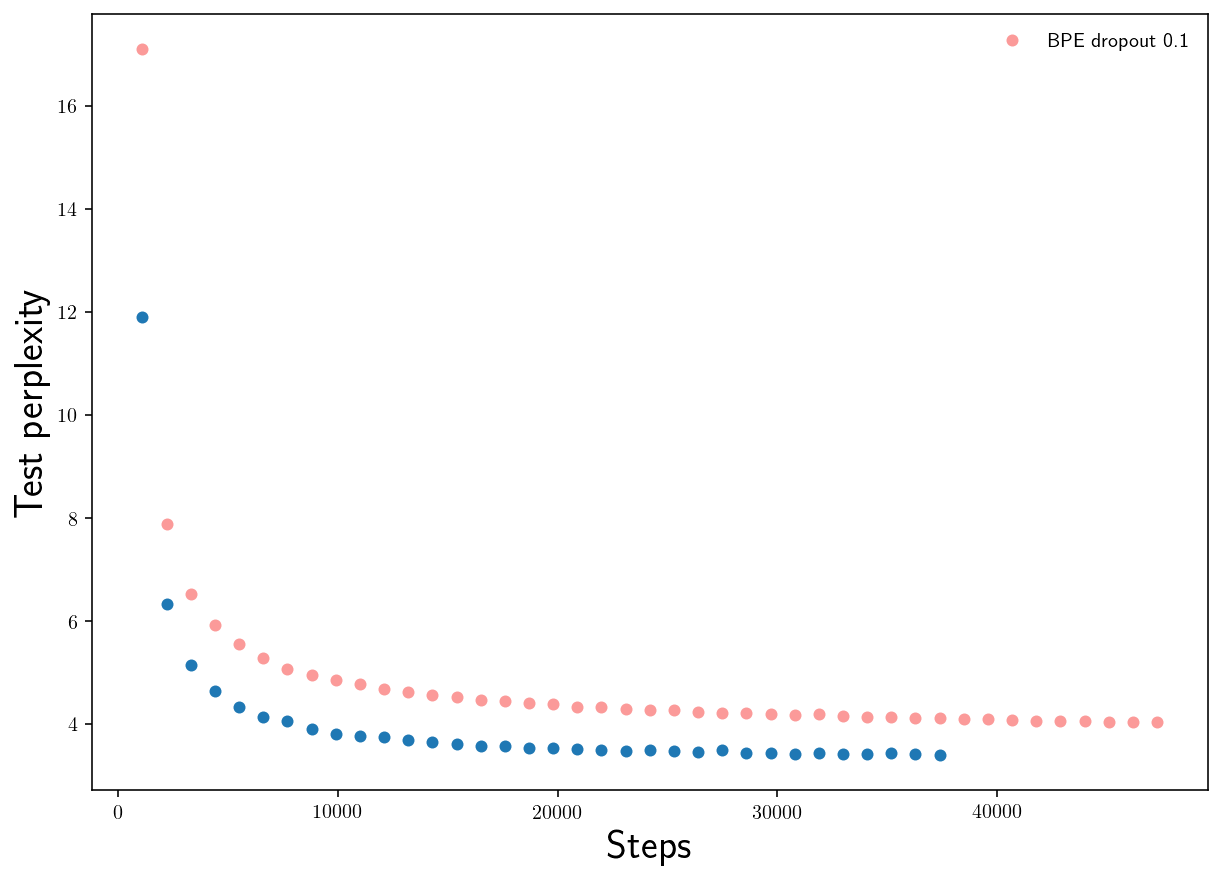

In [6]:
steps, perp = get_eval_data(
    [  
        Path('/smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-17/2020-02-20')
    ]
)
steps1, perp1 = get_eval_data(
    [  
        Path('/smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-18/2020-02-19')
    ]
)

if steps:
    fig, axe = plt.subplots(figsize=(10, 10 / 1.4))

    axe.plot(steps, perp, 'o',)
    axe.plot(steps1, perp1, 'o', label='BPE dropout 0.1')
    plt.legend()
    axe.set_xlabel('Steps')
    axe.set_ylabel('Test perplexity')
    print(f'minimum perplexity {min(perp)}')
    print(f'minimum perplexity {min(perp1)}')

In [12]:
steps, perp = get_eval_data(
    [  
        Path('/smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-17/2020-02-22/')
    ]
)

if steps:
    fig, axe = plt.subplots(figsize=(10, 10 / 1.4))

    axe.plot(steps, perp, 'o',)
    #axe.plot(steps1, perp1, 'o', label='BPE dropout 0.1')
    plt.legend()
    axe.set_xlabel('Steps')
    axe.set_ylabel('Test perplexity')
    print(f'minimum perplexity {min(perp)}')
    print(f'minimum perplexity {min(perp1)}')

In [13]:
steps

[]

In [14]:
ls /smartml-athena/processed-data/fundef-docstrings/models/gpt2/expt-2020-02-17/2020-02-22/checkpoint-100100/

config.json  optimizer.pt  pytorch_model.bin  scheduler.pt  training_args.bin
